### 1. Membaca dataset (load dataset).

In [1]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer_data = load_breast_cancer()

#Seperate data into training(80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=0)

### 2. Melakukan pembelajaran dengan algoritma berikut:

#### a. DecisionTreeClassifier

|--- worst concave points <= 0.14
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 107.75
|   |   |   |--- radius error <= 1.05
|   |   |   |   |--- mean concavity <= 0.14
|   |   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |   |--- worst perimeter <= 99.85
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst perimeter >  99.85
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |   |--- worst texture <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst texture >  32.83
|   |   |   |   |   |   |   |   |--- worst texture <= 33.81
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- worst texture >  33.81
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- area error >  48.98
|   |   |   |   |   |   |--- wo

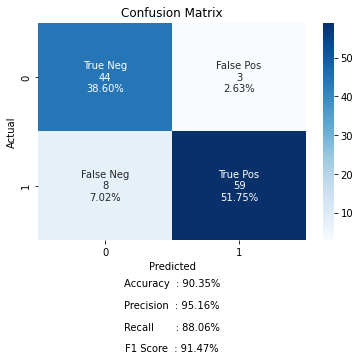

Cross Validation Score for accuracy is 0.909 (+/-0.051)
Cross Validation Score for precision is 0.941 (+/-0.080)
Cross Validation Score for recall is 0.927 (+/-0.051)
Cross Validation Score for f1_score is 0.925 (+/-0.046)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Create Decision Tree classifer object
clf_model = DecisionTreeClassifier()
clf_model = clf_model.fit(X_train,y_train)
print(export_text(clf_model, feature_names=list(cancer_data.feature_names)))

#Save Model
import pickle
pickle.dump(clf_model, open('clf_model.pkl','wb'))

# Load Model
loaded_clf_model = pickle.load(open('clf_model.pkl','rb'))

# Predict the response for test dataset
y_pred = loaded_clf_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()


#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

for key, value in scoring.items():
    scores = cross_val_score(loaded_clf_model, cancer_data.data, cancer_data.target, cv=10, scoring=scoring[key])
    print("Cross Validation Score for",key,"is %.3f (+/-%.3f)" % (scores.mean(), scores.std() * 2))


#### b. Id3Estimator

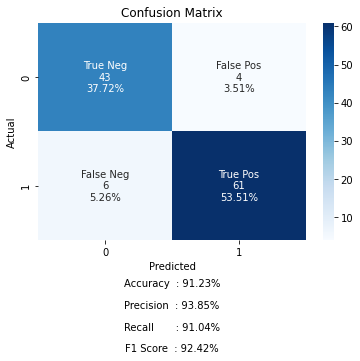

In [3]:
#Fix Skleard import six error
import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text

# Create ID3 classifer object
id3_model = Id3Estimator()
id3_model.fit(X_train, y_train)

#UNCOMMENT TO EXPORT TREE================================================================================================
# export_graphviz(id3_model.tree_, 'tree.dot', cancer_data.feature_names)
# print(export_text(id3_model.tree_, cancer_data.feature_names))
#=======================================================================================================================

#Save model
import pickle
pickle.dump(id3_model, open("id3_model.pkl","wb"))

#Load model
loaded_id3_model = pickle.load(open("id3_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_id3_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()


#### c. K Means

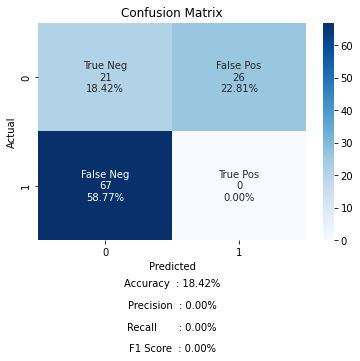

In [4]:
from sklearn.cluster import KMeans

# Create KMeans classifer object
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(X_train)

#Save model
import pickle
pickle.dump(kmeans_model, open("kmeans_model.pkl","wb"))

#Load model
loaded_kmeans_model = pickle.load(open("kmeans_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_kmeans_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### d LogisticRegression

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


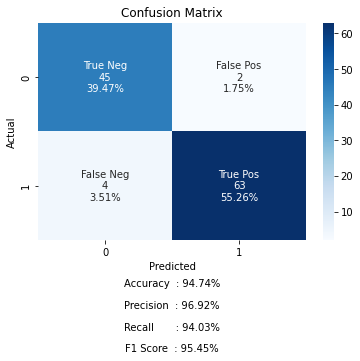

In [5]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifer object
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(logreg_model, open("logreg_model.pkl","wb"))

#Load model
loaded_logreg_model = pickle.load(open("logreg_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_logreg_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### e. Neural_network

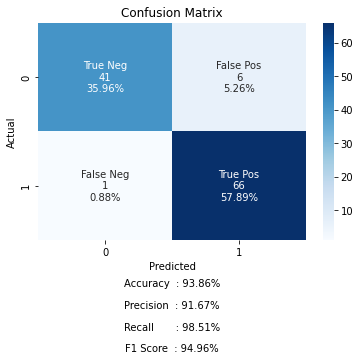

In [6]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifer object
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(mlp_model, open("mlp_model.pkl","wb"))

#Load model
loaded_mlp_model = pickle.load(open("mlp_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_mlp_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### f. SVM

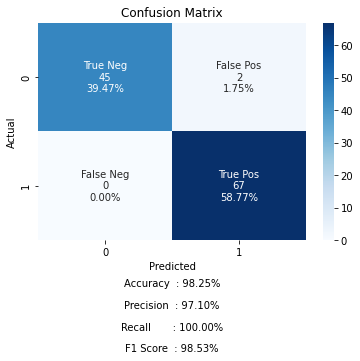

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create SVM classifer object
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(svm_model, open("svm_model.pkl","wb"))

#Load model
loaded_svm_model = pickle.load(open("svm_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_svm_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()